<a href="https://colab.research.google.com/github/hima-prog/AICTE-internship-projects/blob/main/Sentiment_Analysis_on_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
  0% 0.00/25.7M [00:00<?, ?B/s]
100% 25.7M/25.7M [00:00<00:00, 695MB/s]


In [4]:
!unzip imdb-dataset-of-50k-movie-reviews.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
data=pd.read_csv('IMDB Dataset.csv')

In [7]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [8]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [9]:
data.dropna(inplace=True)

In [10]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [11]:
def clean_review(review):
  str=' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
  return str

In [12]:
from nltk.corpus import stopwords
import re # Import the regular expression module

# Make the stopwords a set for faster lookups
stop_words_set = set(stopwords.words('english'))

def clean_review_optimized(review):
    # Convert to lowercase and remove punctuation
    review = re.sub(r'[^\w\s]', '', review.lower())
    # Split into words and filter out stopwords
    return ' '.join(word for word in review.split() if word not in stop_words_set)

# Apply the optimized function
data['review'] = data['review'].apply(clean_review_optimized)

print(data.head())

                                              review sentiment
0  one reviewers mentioned watching 1 oz episode ...  positive
1  wonderful little production br br filming tech...  positive
2  thought wonderful way spend time hot summer we...  positive
3  basically theres family little boy jake thinks...  negative
4  petter matteis love time money visually stunni...  positive


In [13]:
from wordcloud import WordCloud


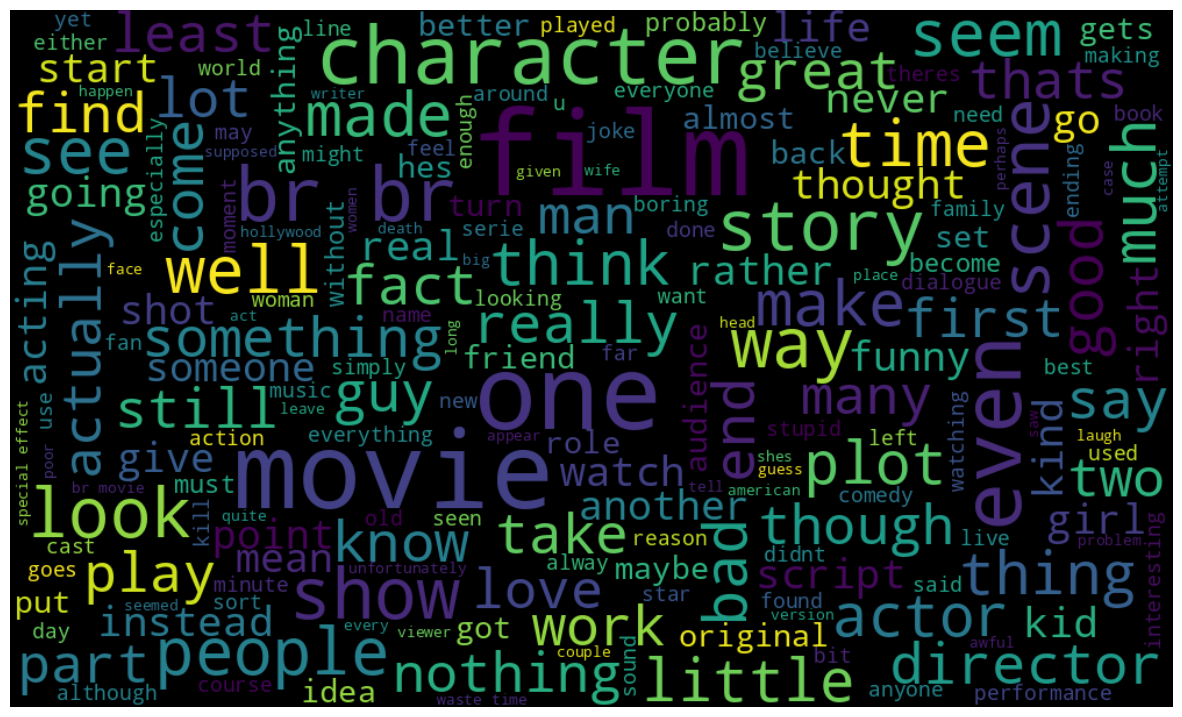

In [14]:
reviews=' '.join(word for word in data['review'][data['sentiment']=='negative'].astype(str))
wordcloud=WordCloud(width=1000,height=600,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

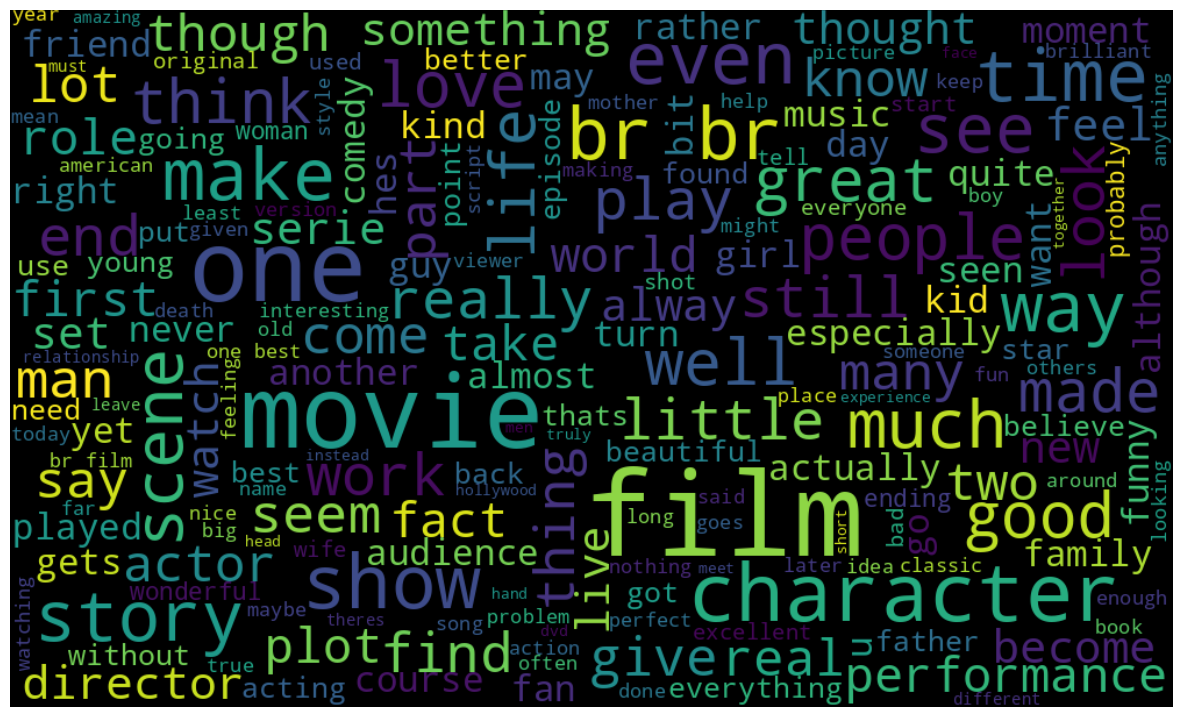

In [15]:
reviews=' '.join(word for word in data['review'][data['sentiment']=='positive'].astype(str))
wordcloud=WordCloud(width=1000,height=600,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=2500)


In [17]:
reviews=cv.fit_transform(data['review']).toarray()

In [18]:
data['sentiment']=data['sentiment'].replace(['positive','negative'],[1,0])

/tmp/ipython-input-18-3724057555.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment']=data['sentiment'].replace(['positive','negative'],[1,0])


In [19]:
data['sentiment'].value_counts()

,count
sentiment,
1,25000
0,25000


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
reviews_train, reviews_test, sentiment_train, sentiment_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [26]:
model.fit(reviews_train, sentiment_train)

LogisticRegression()

In [27]:
predict = model.predict(reviews_test)

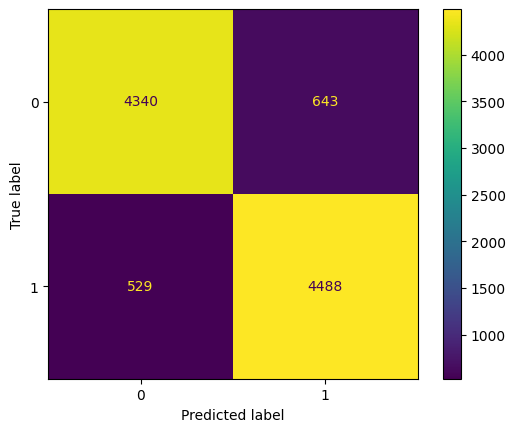

In [28]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(sentiment_test,predict,labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

In [29]:
import pickle as pk

In [30]:
pk.dump(model,open('model.pkl','wb'))

In [31]:
import pickle as pk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
# Import other necessary libraries for cleaning/preprocessing if applicable
import re
from nltk.corpus import stopwords

# Assuming the files are in the same directory as your script
model_file_path = 'model.pkl'
vectorizer_file_path = 'vectorizer.pkl'

try:
    # Load the model
    with open(model_file_path, 'rb') as f:
        loaded_model = pk.load(f)
    print("Model loaded successfully.")

    # Load the vectorizer
    with open(vectorizer_file_path, 'rb') as f:
        loaded_vectorizer = pk.load(f)
    print("Vectorizer loaded successfully.")

    # Now you can use both to preprocess new data and make predictions

    # Example of processing new data and making a prediction
    new_reviews = ["This movie was absolutely amazing!", "It was a terrible film."]

    # Apply the same cleaning steps as in your training code
    stop_words_set = set(stopwords.words('english'))

    def clean_review_for_prediction(review):
        review = re.sub(r'[^\w\s]', '', review.lower())
        return ' '.join(word for word in review.split() if word not in stop_words_set)

    cleaned_new_reviews = [clean_review_for_prediction(review) for review in new_reviews]

    # Transform the cleaned new reviews using the loaded vectorizer
    new_reviews_transformed = loaded_vectorizer.transform(cleaned_new_reviews)

    # Make predictions using the loaded model
    predictions = loaded_model.predict(new_reviews_transformed)

    # Interpret the predictions (0 for negative, 1 for positive)
    sentiment_mapping = {0: 'negative', 1: 'positive'}
    predicted_sentiments = [sentiment_mapping[pred] for pred in predictions]

    print("New reviews:", new_reviews)
    print("Predicted sentiments:", predicted_sentiments)

except FileNotFoundError:
    print("Error: One or both of the pickle files were not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Model loaded successfully.
Vectorizer loaded successfully.
New reviews: ['This movie was absolutely amazing!', 'It was a terrible film.']
Predicted sentiments: ['positive', 'negative']


In [32]:
model = pk.load(open('/content/model.pkl', 'rb'))
vectorizer = pk.load(open('/content/vectorizer.pkl', 'rb'))


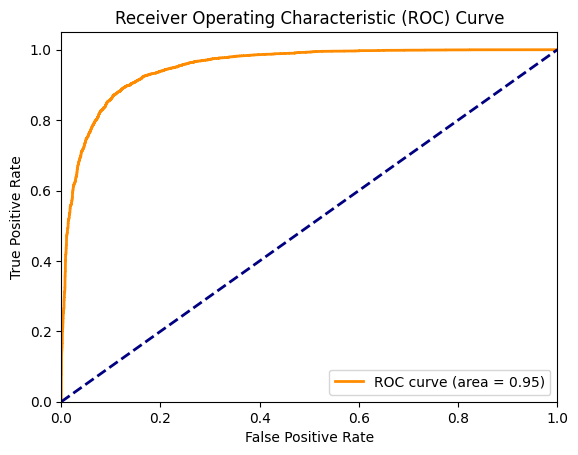

AUC: 0.95


In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities of the positive class
# The predict_proba method returns probabilities for both classes,
# we need the probabilities for the positive class (class 1)
predict_proba = model.predict_proba(reviews_test)[:, 1]

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(sentiment_test, predict_proba)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.2f}")

In [34]:
import pickle as pk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords

# Assume your model and vectorizer are already loaded
# For example, from your previous cells:
# model = pk.load(open('/content/model.pkl', 'rb'))
# vectorizer = pk.load(open('/content/vectorizer.pkl', 'rb')) # Assuming this is the correct name for your vectorizer

# Define the cleaning function (should be the same as the one used during training)
stop_words_set = set(stopwords.words('english'))

def clean_review_for_prediction(review):
    review = re.sub(r'[^\w\s]', '', review.lower())
    return ' '.join(word for word in review.split() if word not in stop_words_set)

# Get a new review from the user
new_review = input("Enter a movie review: ")

# Clean the new review
cleaned_new_review = clean_review_for_prediction(new_review)

# Transform the cleaned new review using the loaded vectorizer
# The vectorizer expects a list of documents, so we pass the single review in a list
new_review_transformed = vectorizer.transform([cleaned_new_review])

# Make a prediction using the loaded model
prediction = model.predict(new_review_transformed)

# Interpret the prediction
sentiment_mapping = {0: 'NEGATIVE REVIEW', 1: 'POSITIVE REVIEW'}
predicted_sentiment = sentiment_mapping[prediction[0]] # prediction is an array, so access the first element

# Print the result
print(f"The review is predicted to be: {predicted_sentiment}")

Enter a movie review: An incredibly well-executed project with attention to both functionality and user experience. The integration of real-time detection and UI was impressive!
The review is predicted to be: POSITIVE REVIEW
